In [1]:
from pyforest import *

In [2]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=997bb8408573e792762acc66b67a27e7ef556805bad588af38bbd225b6177592
  Stored in directory: /Users/lakshmireddy/Library/Caches/pip/wheels/72/b6/6c/b593d021f7e83f481c5208bc23df0084bcfbeb5b141352b882
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [1]:
pd.set_option('display.max_columns',None)

<IPython.core.display.Javascript object>

In [2]:
cc=pd.read_csv("credit_card.csv")

<IPython.core.display.Javascript object>

In [3]:
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
cc.shape

(30000, 25)

In [5]:
cc.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [7]:
cc.drop('ID',axis=1,inplace=True)

##### Here several features have to be converted to categorical data types.

In [8]:
cc['SEX']=cc['SEX'].astype('category')
cc['EDUCATION']=cc['EDUCATION'].astype('category')
cc['MARRIAGE']=cc['MARRIAGE'].astype('category')
cc['DEFAULT']=cc['DEFAULT'].astype('category')

In [9]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  int64   
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_1      30000 non-null  int64   
 6   PAY_2      30000 non-null  int64   
 7   PAY_3      30000 non-null  int64   
 8   PAY_4      30000 non-null  int64   
 9   PAY_5      30000 non-null  int64   
 10  PAY_6      30000 non-null  int64   
 11  BILL_AMT1  30000 non-null  int64   
 12  BILL_AMT2  30000 non-null  int64   
 13  BILL_AMT3  30000 non-null  int64   
 14  BILL_AMT4  30000 non-null  int64   
 15  BILL_AMT5  30000 non-null  int64   
 16  BILL_AMT6  30000 non-null  int64   
 17  PAY_AMT1   30000 non-null  int64   
 18  PAY_AMT2   30000 non-null  int64   
 19  PAY_AMT3   30000 non-null

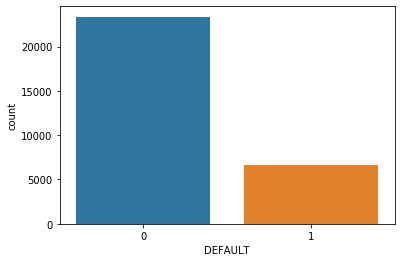

In [32]:
sns.countplot(cc.DEFAULT)
plt.show()

In [33]:
cc.DEFAULT.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

# EDA

## DATA CLEANING

We can see that for marriage, education and repayment status features, there is presence of some label which is not been defined for the dataset.

Thus we need to clean the data appropriately.

* **MARRIAGE:** Defined labels are - 1 = married; 2 = single; 3 = others, however in the data set, there is presence of a 0 class which should be added with the 3rd class viz. others.
* **EDUCATION:** Defined classes are - 1 = graduate school; 2 = university; 3 = high school; 4 = others, however in the data set there is presence of 0,5 & 6 labels which should be added to the 4th class label - others.
* **Repayment Status (PAY_1 to PAY 6):** Defined labels are, -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 8 = payment delay for eight months, so on and so forth. However there is presence of class labels -1,-2 in the daa set, which should be combined and added to 0 class label which would indicate payment without any dues.

##### CHANGING UNDEFINED LABELS OF MARRIAGE INTO CLASS LABEL 3 (OTHERS)

In [34]:
cc.loc[cc['MARRIAGE']==0,'MARRIAGE']=3

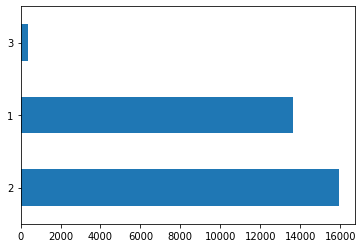

In [35]:
cc['MARRIAGE'].value_counts()[:3].plot(kind='barh')
plt.show()

##### CHANGING UNDEFINED LABELS OF EDUCATION INTO CLASS LABEL 4 (OTHERS)

In [36]:
cc.loc[(cc['EDUCATION']==0)|(cc['EDUCATION']==5)|(cc['EDUCATION']==6),'EDUCATION']=4

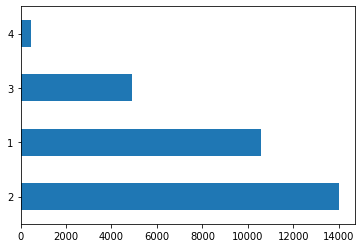

In [37]:
cc['EDUCATION'].value_counts()[:4].plot(kind='barh')
plt.show()

##### CHANGING UNDEFINED LABELS OF REPAYMENT STATUS COLUMNS (PAY 1 to PAY 6) INTO CLASS LABEL 0 (OTHERS)

In [38]:
val=(cc['PAY_1']==-2)|(cc['PAY_1']==-1)
cc.loc[val,'PAY_1']=0
val=(cc['PAY_2']==-2)|(cc['PAY_2']==-1)
cc.loc[val,'PAY_2']=0
val=(cc['PAY_3']==-2)|(cc['PAY_3']==-1)
cc.loc[val,'PAY_3']=0
val=(cc['PAY_4']==-2)|(cc['PAY_4']==-1)
cc.loc[val,'PAY_4']=0
val=(cc['PAY_5']==-2)|(cc['PAY_5']==-1)
cc.loc[val,'PAY_5']=0
val=(cc['PAY_6']==-2)|(cc['PAY_6']==-1)
cc.loc[val,'PAY_6']=0

In [39]:
cc['PAY_1'].value_counts()[:9]

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

##### FURTHER DISCREPENCIES WERE FOUND IN THE REPAYMENT STATUS COLUMN. 

In [40]:
vals = ((cc.PAY_6 == 0) & (cc.BILL_AMT6 > 0) & (cc.PAY_5 > 0))
cc[vals][['BILL_AMT6', 'PAY_AMT6', 'BILL_AMT6', 'PAY_AMT6', 'PAY_6', 'PAY_5','PAY_4']].sample(10,random_state=50)

,BILL_AMT6,PAY_AMT6,BILL_AMT6,PAY_AMT6,PAY_6,PAY_5,PAY_4
21462,22814,1000,22814,1000,0,2,2
28576,72439,3100,72439,3100,0,2,2
3743,20650,0,20650,0,0,2,2
23865,54646,1800,54646,1800,0,2,0
14322,1075,1392,1075,1392,0,2,0
1705,15049,4000,15049,4000,0,2,2
2810,17500,805,17500,805,0,2,0
12024,47519,1800,47519,1800,0,2,0
248,25358,2566,25358,2566,0,2,0
25604,33416,1221,33416,1221,0,2,2


* We can see that user 14322 has had a bill amount of 1075\\$ for the month of April. However an amount equal to 1392\\$ was repaid back.
* In the following month of May, a credit amounting 1075\\$ was due again. Effective due = 1075-1392+1075 = 758$. However the client paid in excess amount equal to 1392\\$.
* However in the repayment status columns, PAY_6 to PAY_4, it can be observed that user 14322 has defaulted by 2 months. 
* This decripancy could be due to unavailability of year round credit history or due to some error in the class labels of those features.
* There are cases where the user has paid off the entire amount still ends up with a delay of 2 months in repayment.

This kind of discrepancy exists in the PAY_1 to PAY_6 features. 

* Hence it would be sensible to convert the the repayment status features to Binary or remove them from our modelling as inference about repayment status can be obtained from other features.

* **We choose to drop the PAY_1 to PAY_6 features.**

In [12]:
cc.drop('PAY_1',axis=1,inplace=True)
cc.drop('PAY_2',axis=1,inplace=True) 
cc.drop('PAY_3',axis=1,inplace=True) 
cc.drop('PAY_4',axis=1,inplace=True) 
cc.drop('PAY_5',axis=1,inplace=True)
cc.drop('PAY_6',axis=1,inplace=True)

## UNIVARIATE ANALYSIS

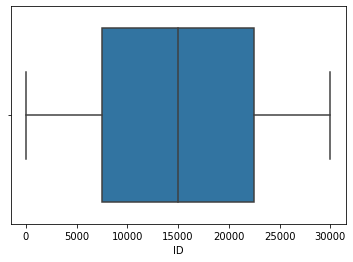

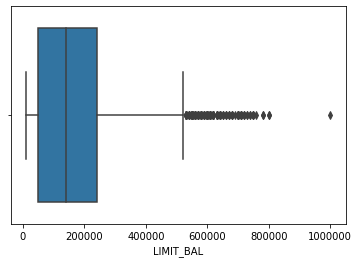

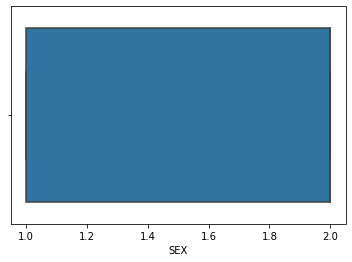

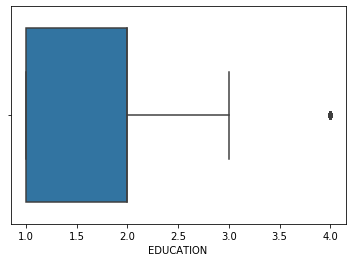

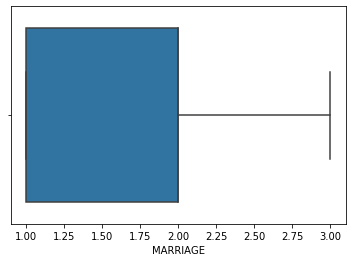

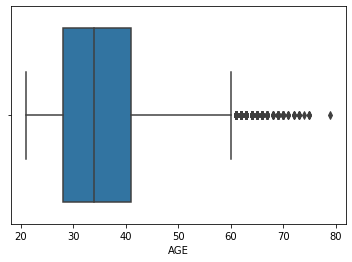

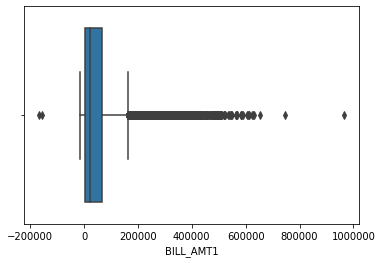

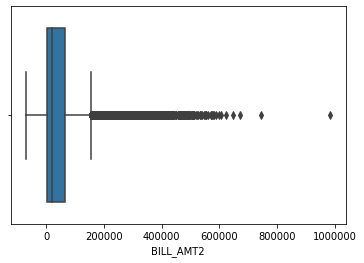

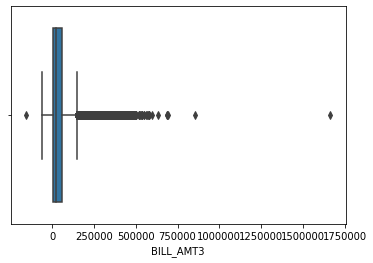

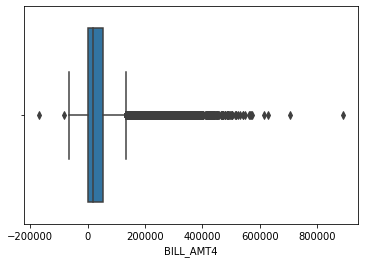

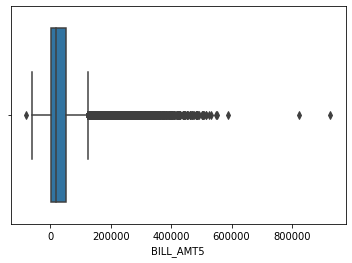

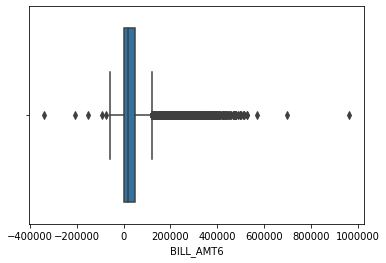

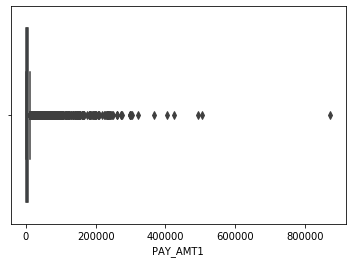

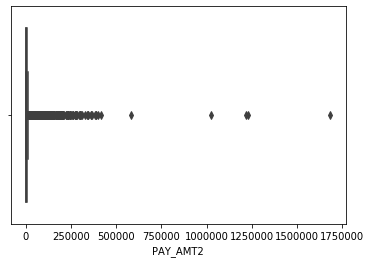

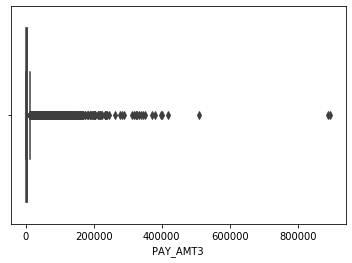

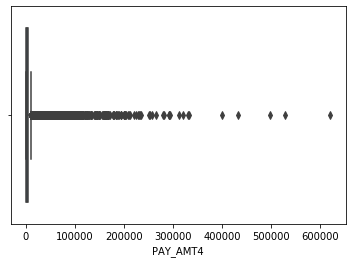

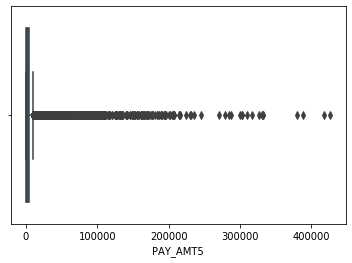

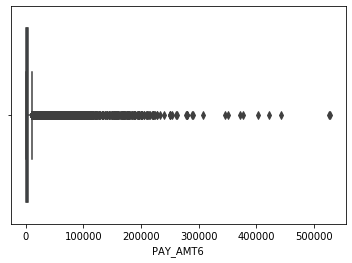

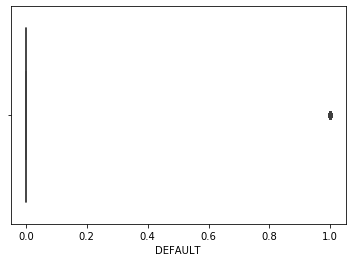

In [13]:
for i in cc.select_dtypes('int64').columns:
    sns.boxplot(cc[i])
    plt.show()

In [14]:
for i in cc.select_dtypes('category').columns[:-1]:
    sns.countplot(cc[i])
    plt.show()

In [168]:
cc.describe(exclude='category')

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [169]:
cc.describe(include='category')

,SEX,EDUCATION,MARRIAGE,DEFAULT
count,30000,30000,30000,30000
unique,2,4,3,2
top,2,2,2,0
freq,18112,14030,15964,23364


##### We can see some features have presence of outliers.

#### COLUMN WISE OUTLIER TREATMENT:

In [23]:
ncols=cc.select_dtypes('int64')
q1=ncols.quantile(0.25)
q3=ncols.quantile(0.75)
IQR=q3-q1
cwo=((ncols.iloc[:] <(q1-1.5*IQR))|(ncols.iloc[:]>(q3+1.5*IQR))).sum(axis=0)

In [171]:
opdf=pd.DataFrame(cwo,index=ncols.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(ncols),2)
opdf

,No. of Outliers,Percentage Outliers
LIMIT_BAL,167,0.56
AGE,272,0.91
BILL_AMT1,2400,8.00
BILL_AMT2,2395,7.98
BILL_AMT3,2469,8.23
BILL_AMT4,2622,8.74
BILL_AMT5,2725,9.08
BILL_AMT6,2693,8.98
PAY_AMT1,2745,9.15
PAY_AMT2,2714,9.05


#### ROWWISE OUTLIER GRID

In [172]:
rwo=(((ncols[:]<(q1-1.5*IQR))|(ncols[:]>(q3+1.5*IQR))).sum(axis=1))

In [173]:
ro005=(((rwo/len(ncols.columns))<0.05).sum())*100/len(ncols)
ro005

65.16

##### 65.16 %  of total rows has less than or equal to 5% outliers in them. 

Similarly calculating till 60% presence of row wise outliers.

In [174]:
ro01=(((rwo/len(ncols.columns))<0.1).sum())*100/len(ncols)
ro015=(((rwo/len(ncols.columns))<0.15).sum())*100/len(ncols)
ro02=(((rwo/len(ncols.columns))<0.2).sum())*100/len(ncols)
ro025=(((rwo/len(ncols.columns))<0.25).sum())*100/len(ncols)
ro03=(((rwo/len(ncols.columns))<0.30).sum())*100/len(ncols)
ro035=(((rwo/len(ncols.columns))<=0.35).sum())*100/len(ncols)
ro04=(((rwo/len(ncols.columns))<=0.4).sum())*100/len(ncols)
ro045=(((rwo/len(ncols.columns))<=0.45).sum())*100/len(ncols)
ro05=(((rwo/len(ncols.columns))<=0.50).sum())*100/len(ncols)
ro055=(((rwo/len(ncols.columns))<0.55).sum())*100/len(ncols)
ro06=(((rwo/len(ncols.columns))<0.6+0).sum())*100/len(ncols)

In [175]:
pd.DataFrame(np.round([ro005,ro01,ro015,ro02,ro025,ro03,ro035,ro04,ro045,ro05,ro055,ro06],2),
             index=['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'],
            columns=['% Outliers (Row-wise)'])

,% Outliers (Row-wise)
5%,65.16
10%,79.75
15%,85.28
20%,85.28
25%,88.55
30%,91.08
35%,91.08
40%,92.81
45%,95.93
50%,97.42


In [176]:
indout=[int(i) for i in np.argwhere((rwo/len(ncols.columns))>=0.45)]

In [177]:
cc.drop(index=indout,inplace=True)

In [178]:
ccols=cc.select_dtypes('category')
ncols=cc.select_dtypes('int64')

###### * We have dropped all the rows which has more than 45% of outliers present in them.
###### * Now we have to treat the rest of the  outliers.

We will use MICE imputation to treat the outliers:

* The remaining outliers are converted to NULL(NaN) values.
* Then we impute the NULL values using MICE (Multivariate Imputation by Chained Equation)

In [183]:
ncols=ncols[~((ncols[:]<(q1-1.5*IQR))|(ncols[:]>(q3+1.5*IQR)))]

#### Now we have imputed NULL to all outliers. It can be seen below.

In [187]:
ncols.isnull().sum()

LIMIT_BAL     101
AGE           235
BILL_AMT1    1312
BILL_AMT2    1284
BILL_AMT3    1326
BILL_AMT4    1468
BILL_AMT5    1558
BILL_AMT6    1575
PAY_AMT1     2063
PAY_AMT2     2079
PAY_AMT3     1999
PAY_AMT4     2292
PAY_AMT5     2288
PAY_AMT6     2306
dtype: int64

In [188]:
from impyute.imputation.cs import mice

In [190]:
imputed_train=mice(ncols.values)

In [198]:
ncols=pd.DataFrame(imputed_train.reshape(len(ncols),-1),columns=ncols.columns,index=ccols.index)
ncols.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.000000,0.0,0.0,0.0,0.0
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.000000,1000.0,1000.0,0.0,2000.0
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.000000,1000.0,1000.0,1000.0,5000.0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.000000,1200.0,1100.0,1069.0,1000.0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,5815.769089,10000.0,9000.0,689.0,679.0


In [199]:
ncols.isnull().sum()

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

We can see that all NULL values have been imputed. Now we have to check if outliers are still present in the dataset.

In [200]:
((ncols.iloc[:] <(q1-1.5*IQR))|(ncols.iloc[:]>(q3+1.5*IQR))).sum()

LIMIT_BAL     0
AGE           0
BILL_AMT1     0
BILL_AMT2     4
BILL_AMT3    10
BILL_AMT4    28
BILL_AMT5    24
BILL_AMT6    24
PAY_AMT1      3
PAY_AMT2      1
PAY_AMT3      2
PAY_AMT4      0
PAY_AMT5      1
PAY_AMT6      0
dtype: int64

#### We can see that, Outliers have reduced to a great extent. These outliers can be dropped.

In [201]:
ncols=ncols[~((ncols.iloc[:] <(q1-1.5*IQR))|(ncols.iloc[:]>(q3+1.5*IQR)))]

In [202]:
((ncols.iloc[:] <(q1-1.5*IQR))|(ncols.iloc[:]>(q3+1.5*IQR))).sum()

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

#### Thus we have completely eliminated the outliers with minimal loss of data.

In [211]:
cc=pd.concat([ncols,ccols],axis=1)
cc.index=range(len(cc))

In [213]:
cc.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,DEFAULT
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.000000,0.0,0.0,0.0,0.0,2,2,1,1
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.000000,1000.0,1000.0,0.0,2000.0,2,2,2,1
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.000000,1000.0,1000.0,1000.0,5000.0,2,2,2,0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.000000,1200.0,1100.0,1069.0,1000.0,2,2,1,0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,5815.769089,10000.0,9000.0,689.0,679.0,1,2,1,0


## BIVARIATE ANALYSIS

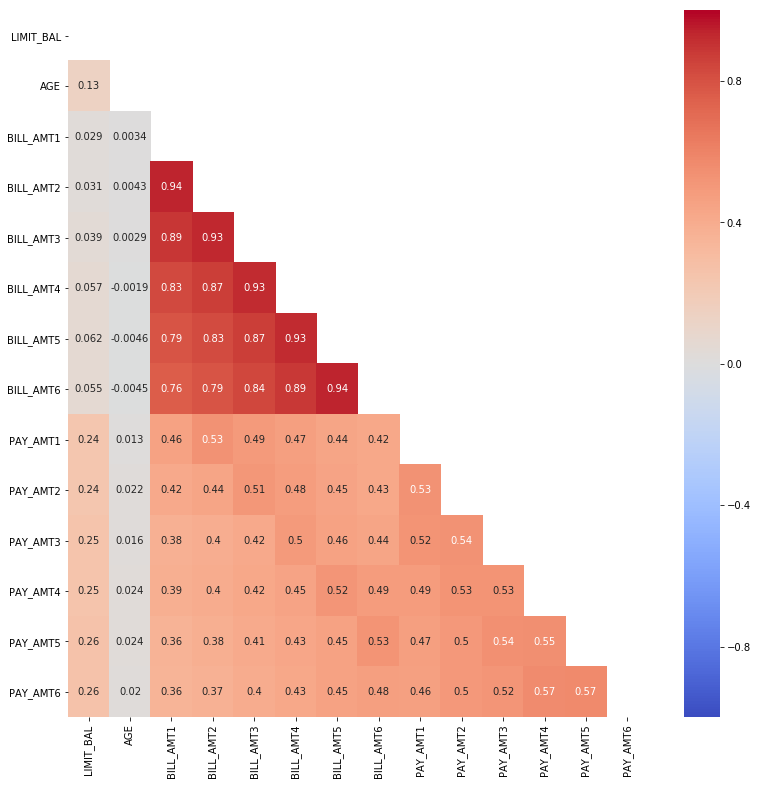

In [214]:
cover = np.zeros_like(cc.corr(), dtype=np.bool)
cover[np.triu_indices_from(cover)] = True
plt.figure(figsize=(13,13))
sns.heatmap(cc.corr(),vmin=-1, cmap='coolwarm', annot=True, mask = cover)
plt.show()

##### THERE IS STRONG CORRELATION AMONG INDEPENDENT FEATURES BILL_AMT1 TO BILL_AMT6. 

* **This is taken care of in the feature engineering process.**

### FEATURE ENGINEERING:

An observation made in the dataset is the presence of users who have a bill amount greater than their credit limit. We will create features called Credit_Limit Utilisation viz. how much % of the credit limit is utilised for a span of 6 months.

In [217]:
cc['Credit_Lim_Util1']=cc['BILL_AMT1']/cc['LIMIT_BAL']
cc['Credit_Lim_Util2']=cc['BILL_AMT2']/cc['LIMIT_BAL']
cc['Credit_Lim_Util3']=cc['BILL_AMT3']/cc['LIMIT_BAL']
cc['Credit_Lim_Util4']=cc['BILL_AMT4']/cc['LIMIT_BAL']
cc['Credit_Lim_Util5']=cc['BILL_AMT5']/cc['LIMIT_BAL']
cc['Credit_Lim_Util6']=cc['BILL_AMT6']/cc['LIMIT_BAL']

##### Now we check for data points(clients) who have used more than the credit limit in a span of 6 months.

In [218]:
k1=cc[(cc['Credit_Lim_Util1']>1)|(cc['Credit_Lim_Util2']>1)|(cc['Credit_Lim_Util3']>1)|(cc['Credit_Lim_Util4']>1)|(cc['Credit_Lim_Util5']>1)|(cc['Credit_Lim_Util6']>1)]
k1[['Credit_Lim_Util1', 'Credit_Lim_Util2', 'Credit_Lim_Util3', 'Credit_Lim_Util4', 'Credit_Lim_Util5', 'Credit_Lim_Util6']].head()

,Credit_Lim_Util1,Credit_Lim_Util2,Credit_Lim_Util3,Credit_Lim_Util4,Credit_Lim_Util5,Credit_Lim_Util6
5,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480
14,1.012280,0.583460,0.562320,0.575420,0.590620,0.604220
46,0.872350,0.923950,0.973800,0.993250,1.024000,1.003150
57,1.011429,1.029429,0.999114,0.235971,0.201371,0.011857
74,0.946233,0.987067,1.010867,0.933467,0.881533,0.213700


In [220]:
k1['Cred_Overuse']=(k1[['Credit_Lim_Util1', 'Credit_Lim_Util2', 'Credit_Lim_Util3', 'Credit_Lim_Util4', 'Credit_Lim_Util5', 'Credit_Lim_Util6']]>1).sum(axis=1)
k1['Cred_Overuse']=k1['Cred_Overuse'].astype('category')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


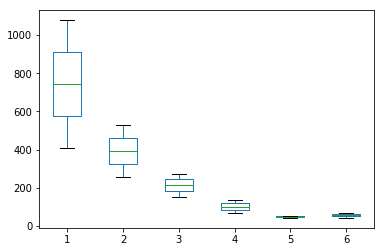

In [221]:
pd.crosstab(k1['DEFAULT'],k1['Cred_Overuse']).plot(kind='box')
plt.show()

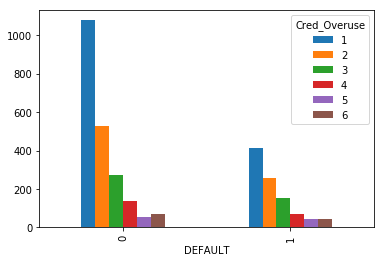

In [222]:
pd.crosstab(k1['DEFAULT'],k1['Cred_Overuse']).plot(kind='bar')
plt.show()

##### We can see that of the people who defaulted, depends on occurences of credit over utilisation.
##### We can also see that customers who has exceeded the credit limit  in just one or two month(s) has the highest case of defaulters.

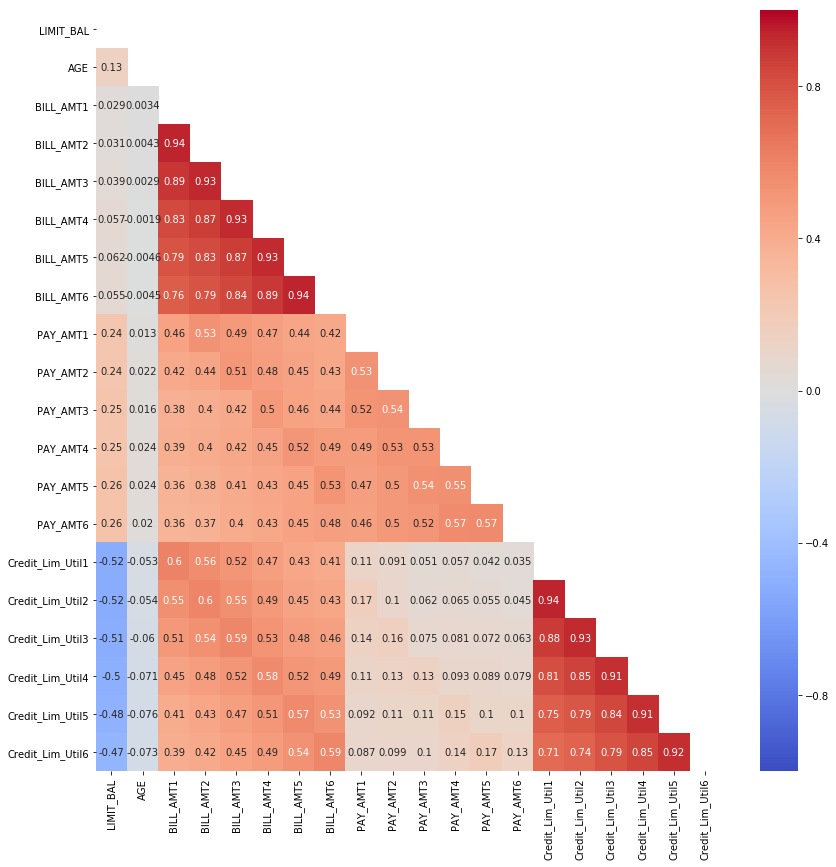

In [223]:
cover = np.zeros_like(cc.corr(), dtype=np.bool)
cover[np.triu_indices_from(cover)] = True
plt.figure(figsize=(14,14))
sns.heatmap(cc.corr(),vmin=-1, cmap='coolwarm', annot=True, mask = cover)
plt.show()

* Since these new features are highy correlated with each other, they can be dropped. 
* Another wy could be to take the ratio of the average BILL_AMT and the credit limit for each customer.Se will proceed with the ratio of the average BILL_AMT and the credit limit.
* Later the LIMIT_BAL (Credit Limit) feature can also be dropped.
* It can be achieved by keeping the LIMIT_BAL feature and creating a ratio between BILL_AMT and PAY_AMT, followed by dropping of BILL_AMT and PAY_AMT features.

In [224]:
cc['Credit_Util']=cc[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)/cc['LIMIT_BAL']

In [225]:
cc['Repayment Index6']=cc['PAY_AMT6']/cc['BILL_AMT6']
cc['Repayment Index5']=cc['PAY_AMT5']/cc['BILL_AMT5']
cc['Repayment Index4']=cc['PAY_AMT4']/cc['BILL_AMT4']
cc['Repayment Index3']=cc['PAY_AMT3']/cc['BILL_AMT3']
cc['Repayment Index2']=cc['PAY_AMT2']/cc['BILL_AMT2']
cc['Repayment Index2']=cc['PAY_AMT1']/cc['BILL_AMT1']

In [226]:
cc.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','LIMIT_BAL',
        'Credit_Lim_Util1', 'Credit_Lim_Util2', 'Credit_Lim_Util3', 'Credit_Lim_Util4', 
         'Credit_Lim_Util5', 'Credit_Lim_Util6'],axis=1,inplace=True)

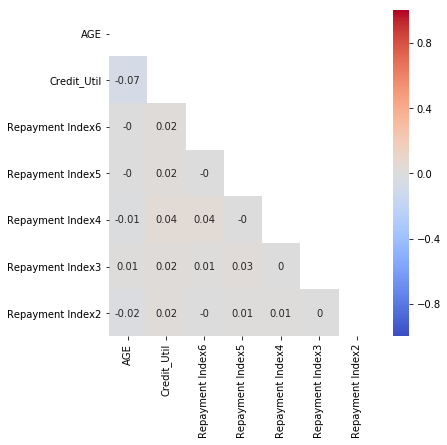

In [227]:
cover = np.zeros_like(cc.corr(), dtype=np.bool)
cover[np.triu_indices_from(cover)] = True
plt.figure(figsize=(6,6))
sns.heatmap(round(cc.corr(),2),vmin=-1, cmap='coolwarm', annot=True, mask = cover)
plt.show()

##### NOW WE HAVE ACHIEVED NEGLIGEABLE COLLINEARITY BETWEEN INDEPENDENT FEATURES WITH NO LOSS OF DATA.

In [228]:
cc.isnull().sum()

AGE                    0
SEX                    0
EDUCATION              0
MARRIAGE               0
DEFAULT                0
Credit_Util            0
Repayment Index6    3337
Repayment Index5    2806
Repayment Index4    2498
Repayment Index3    2258
Repayment Index2    1470
dtype: int64

There are presence of infinity values in the data set due to feature engineering calculations, some rows uderwent a division of 0 with 0.
Sensibly, It can be imputed with 0

In [229]:
cc.iloc[:,6:11]=cc.iloc[:,6:11].fillna(0)
cc=cc.replace([np.inf, -np.inf], 0)

In [230]:
cc.isnull().sum()

AGE                 0
SEX                 0
EDUCATION           0
MARRIAGE            0
DEFAULT             0
Credit_Util         0
Repayment Index6    0
Repayment Index5    0
Repayment Index4    0
Repayment Index3    0
Repayment Index2    0
dtype: int64

In [231]:
cc['SEX']=cc['SEX'].astype('category')

### HYPOTHESIS TESTING:

$I)$ To check the correlation among categorical features, we need to carry out hypothesis testing using chi-square and annova tests.

#### Hypothesis Statements:
$H_{0}$ : No dependence between categorical independent features and default(categorical).

$H_{a}$ : There is a dependency between categorical independent features and default(categorical).

In [232]:
cat_cols=cc.select_dtypes('category').drop('DEFAULT',axis=1)
cat_cols.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [233]:
from scipy.stats import chi2_contingency

In [234]:
for i in cat_cols.columns:
    cont_table = pd.crosstab(cc['DEFAULT'],cc[i],margins = True)
    stat,pval,dof,expected=chi2_contingency(cont_table)
    if pval < 0.05:
        print('Feature {} is significant and the pvalue = {} '.format(i,pval))
        
    else:
        print('Feature {} is not significant and the pvalue = {} '.format(i,pval))

Feature SEX is significant and the pvalue = 7.138743974637452e-10 
Feature EDUCATION is significant and the pvalue = 9.893202385705876e-30 
Feature MARRIAGE is significant and the pvalue = 4.0578549853489654e-05 


##### We can see that all the categorical features are significant contributors to the prediction of DEFAULT. 

## MODELLING:

### FIRST WE APPLY THE MODELS WITHOUT REMOVING THE OUTLIERS

#### LOGISTIC REGRESSION

In [235]:
X=cc.drop('DEFAULT',axis=1)
Y=cc.DEFAULT

In [236]:
X =pd.get_dummies(X,drop_first=True)

In [237]:
X.drop(['EDUCATION_1','EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', ],axis=1,inplace=True)

In [238]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.523147
         Iterations 7


In [239]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                28779
Model:                          Logit   Df Residuals:                    28766
Method:                           MLE   Df Model:                           12
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                 0.01130
Time:                        15:09:03   Log-Likelihood:                -15056.
converged:                       True   LL-Null:                       -15228.
                                        LLR p-value:                 2.491e-66
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
AGE                 -0.0289      0.001    -34.958      0.000      -0.030      -0.027
Credit_Util          0.6806      0.042     16.141      0.000       0.598       0.763
Repayment Index6     0.0001      0.001      0.208      0.835      -0.001       0.001
Repayment Index5 -8.174e-05      0.000     -0.176      0.860      -0.001       0.001
Repayment Index4     0.0028      0.001      2.555      0.011       0.001       0.005
Repayment Index3    -0.0002      0.000     -1.173      0.241      -0.001       0.000
Repayment Index2    -0.0003      0.000     -1.349      0.177      -0.001       0.000
SEX_2               -0.3322      0.028    -12.071      0.000      -0.386      -0.278
EDUCATION_2         -0.0176      0.032     -0.547      0.585      -0.081       0.046
EDUCATION_3          0.1469      0.044      3.352      0.001       0.061       0.233
EDUCATION_4         -1.3738      0.189     -7.273      0.000      -1.744      -1.004
MARRIAGE_2          -0.5080      0.026    -19.217      0.000      -0.560      -0.456
MARRIAGE_3          -0.1197      0.126     -0.947      0.344      -0.367       0.128
====================================================================================
"""

In [240]:
lgcoef = pd.DataFrame(result.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=result.pvalues
pd.options.display.float_format = '{:.3f}'.format
lgcoef

,coef,Odds_ratio,probability,pval
AGE,-0.029,0.972,0.493,0.000
Credit_Util,0.681,1.975,0.664,0.000
Repayment Index6,0.000,1.000,0.500,0.835
Repayment Index5,-0.000,1.000,0.500,0.860
Repayment Index4,0.003,1.003,0.501,0.011
Repayment Index3,-0.000,1.000,0.500,0.241
Repayment Index2,-0.000,1.000,0.500,0.177
SEX_2,-0.332,0.717,0.418,0.000
EDUCATION_2,-0.018,0.983,0.496,0.585
EDUCATION_3,0.147,1.158,0.537,0.001


In [241]:
y_prob= result.predict(X)
y_prob = pd.DataFrame(y_prob, columns=['prob'])
y_prob['pred'] = y_prob['prob'].apply(lambda x: 1 if x>=0.5 else 0)
y_pred = y_prob['pred']
y_prob = y_prob['prob']

In [242]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_curve
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[22386    11]
 [ 6373     9]]


In [243]:
print('Accuracy of logistic regression classifier on test set: ')
print(accuracy_score(y_pred,Y))

Accuracy of logistic regression classifier on test set: 
0.7781715834462629


#### SKLEARN - LOGISTIC REGRESSION

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=60)

In [284]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
mat_train = confusion_matrix(y_train,pred_train)
print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[15665     8]
 [ 4471     1]]


In [286]:
y_pred_prob_train = logreg.predict_proba(X_train)[:, 1]

In [287]:
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[6722    2]
 [1909    1]]


In [288]:
y_pred_prob_test = logreg.predict_proba(X_test)[:, 1]

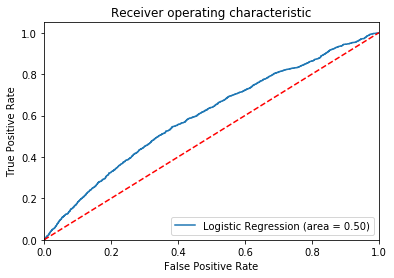

In [289]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [290]:
print('Train AUC_Sore',roc_auc_score(y_train, pred_train))
print('Test AUC_Score',roc_auc_score(y_test, pred_test))

Train AUC_Sore 0.49985659082133316
Test AUC_Score 0.5001130591053069


Text(0, 0.5, 'Frequency')

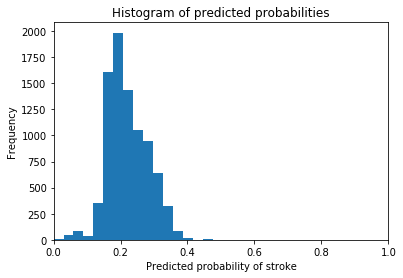

In [291]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob_test, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of stroke')
plt.ylabel('Frequency')

In [292]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.8,]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.f1_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing f1-score is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.1 ******
Our testing f1-score is 0.37
[[ 145 6579]
 [  13 1897]]

******** For i = 0.12 ******
Our testing f1-score is 0.37
[[ 166 6558]
 [  14 1896]]

******** For i = 0.14 ******
Our testing f1-score is 0.37
[[ 191 6533]
 [  19 1891]]

******** For i = 0.16 ******
Our testing f1-score is 0.37
[[ 771 5953]
 [ 124 1786]]

******** For i = 0.18 ******
Our testing f1-score is 0.38
[[1873 4851]
 [ 341 1569]]

******** For i = 0.2 ******
Our testing f1-score is 0.38
[[3031 3693]
 [ 593 1317]]

******** For i = 0.22 ******


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Our testing f1-score is 0.37
[[3925 2799]
 [ 829 1081]]

******** For i = 0.24 ******
Our testing f1-score is 0.36
[[4622 2102]
 [1026  884]]

******** For i = 0.26 ******
Our testing f1-score is 0.34
[[5159 1565]
 [1207  703]]

******** For i = 0.28 ******
Our testing f1-score is 0.30
[[5652 1072]
 [1393  517]]

******** For i = 0.3 ******
Our testing f1-score is 0.23
[[6067  657]
 [1578  332]]

******** For i = 0.32 ******
Our testing f1-score is 0.17
[[6355  369]
 [1701  209]]

******** For i = 0.34 ******
Our testing f1-score is 0.08
[[6563  161]
 [1819   91]]

******** For i = 0.36 ******
Our testing f1-score is 0.03
[[6663   61]
 [1875   35]]

******** For i = 0.38 ******
Our testing f1-score is 0.01
[[6698   26]
 [1898   12]]

******** For i = 0.4 ******
Our testing f1-score is 0.00
[[6715    9]
 [1906    4]]

******** For i = 0.42 ******
Our testing f1-score is 0.00
[[6719    5]
 [1907    3]]

******** For i = 0.44 ******
Our testing f1-score is 0.00
[[6720    4]
 [1907    3]]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [293]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [297]:
y_train_pred_adj=adjusted_classes(y_pred_prob_train,0.22)

In [298]:
y_test_pred_adj=adjusted_classes(y_pred_prob_test,0.22)

In [299]:
mat_train1 = confusion_matrix(y_train,y_train_pred_adj)
print("confusion matrix = \n",mat_train1)

confusion matrix = 
 [[9159 6514]
 [1974 2498]]


In [300]:
mat_test1 = confusion_matrix(y_test,y_test_pred_adj)
print("confusion matrix = \n",mat_test1)

confusion matrix = 
 [[3925 2799]
 [ 829 1081]]


In [301]:
from sklearn.metrics import recall_score
tr=recall_score(y_train, y_train_pred_adj)
te=recall_score(y_test, y_test_pred_adj)
print('Train Recall:',tr)
print('Test Recall:',te)

Train Recall: 0.5585867620751341
Test Recall: 0.5659685863874345


In [302]:
from sklearn.metrics import accuracy_score
tr1=accuracy_score(y_train, y_train_pred_adj)
te1=accuracy_score(y_test, y_test_pred_adj)
print('Train Accuracy:',tr1)
print('Test Accuracy:',te1)

Train Accuracy: 0.5786547530404567
Test Accuracy: 0.5798007875839704


In [303]:
print('Train AUC_Sore',roc_auc_score(y_train, y_train_pred_adj))
print('Test AUC_Score',roc_auc_score(y_test, y_test_pred_adj))

Train AUC_Sore 0.5714837721560511
Test AUC_Score 0.5748492545262573


### DECISION TREE

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [306]:
preds_entropy_test = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [307]:
mat_entropy_train = confusion_matrix(y_train,preds_entropy_train)
print(mat_entropy_train)

[[15654    19]
 [  106  4366]]


In [308]:
mat_entropy_test = confusion_matrix(y_test,preds_entropy_test)
print(mat_entropy_test)

[[5352 1372]
 [1373  537]]


In [309]:
print('train accuracy:',accuracy_score(y_train,preds_entropy_train))
print('test accuracy:',accuracy_score(y_test,preds_entropy_test))
print('train recall:',recall_score(y_train,preds_entropy_train))
print('test recall:',recall_score(y_test,preds_entropy_test))

train accuracy: 0.99379498634897
test accuracy: 0.6820708825573315
train recall: 0.9762969588550984
test recall: 0.281151832460733


In [310]:
print('Train AUC_Sore',roc_auc_score(y_train, preds_entropy_train))
print('Test AUC_Score',roc_auc_score(y_test, preds_entropy_test))

Train AUC_Sore 0.987542341483314
Test AUC_Score 0.5385533106384569


In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
I 
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'roc_auc')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.6646077079881583


In [313]:
model_1 = DecisionTreeClassifier(max_depth=6, criterion='entropy',max_leaf_nodes=20,min_samples_split=2,min_samples_leaf=1)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [314]:
preds_entropy_test1 = model_1.predict(X_test)
preds_entropy_train1 = model_1.predict(X_train)

In [315]:
mat_entropy_train1 = confusion_matrix(y_train,preds_entropy_train1)
print(mat_entropy_train1)

[[15673     0]
 [ 4472     0]]


In [317]:
mat_entropy_test1 = confusion_matrix(y_test,preds_entropy_test1)
print(mat_entropy_test1)

[[6724    0]
 [1910    0]]


In [318]:
print('train accuracy:',accuracy_score(y_train,preds_entropy_train1))
print('test accuracy:',accuracy_score(y_test,preds_entropy_test1))
print('train recall:',recall_score(y_train,preds_entropy_train1))
print('test recall:',recall_score(y_test,preds_entropy_test1))

train accuracy: 0.7780094316207495
test accuracy: 0.7787815612694
train recall: 0.0
test recall: 0.0


In [319]:
print('Train AUC_Sore',roc_auc_score(y_train, preds_entropy_train1))
print('Test AUC_Score',roc_auc_score(y_test, preds_entropy_test1))

Train AUC_Sore 0.5
Test AUC_Score 0.5
